# Gaussian Mixture Models with sklearn

Importing libraries

In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
sns.set_theme(style="darkgrid")
scatter_params = {'s':11, 'cmap': sns.color_palette('crest', 3, as_cmap=True)}
matplotlib.rcParams['figure.figsize'] = (7, 7)

Simulating data for simplicity and visual clarity

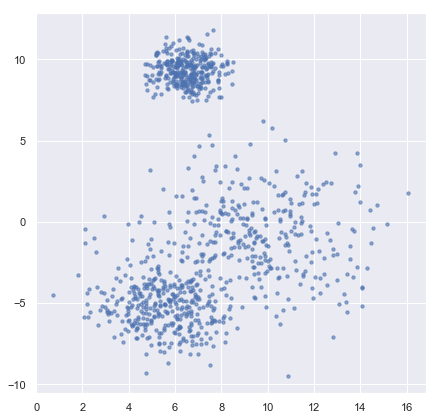

In [3]:
random_seed = 13
n_samples = 1000
X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=[1.5, 0.8, 2.5], random_state=random_seed, shuffle=False)
plt.scatter(X[:, 0], X[:, 1], **scatter_params, alpha=.6)

The GaussianMixture() function creates an object, which we then fit to the data to learn the parameters. 

In [4]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Once we have trained the model, we are ready to make an inference. The fitted GMM object has two options for this task: predict and predict_proba. The first one returns a list of most probable classes of a passed list of points, and the latter returns probabilities of points belonging to a class. 

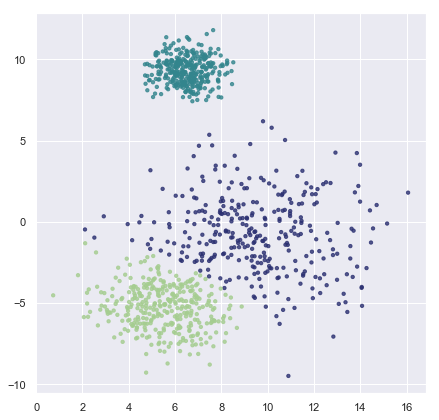

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), **scatter_params, alpha=.8)

The blue and light-green clusters are intersecting, and when calling predict we obtain hard clustering. Let's have a look at `predict_proba` to see how soft clustering is working on the border between purple and yellow cluster.

In [6]:
gmm.predict_proba(X[:5])

array([[7.86923725e-01, 2.07150461e-61, 2.13076275e-01],
       [6.62563156e-01, 5.01114417e-57, 3.37436844e-01],
       [9.44965004e-01, 3.21922071e-84, 5.50349965e-02],
       [9.96783789e-01, 3.53073980e-89, 3.21621123e-03],
       [9.79014723e-01, 2.40010801e-72, 2.09852772e-02]])

Since we have 3 clusters we'll look only on probabilities of cluster 2 as color parameter (on the plot below light-green means low probability, so it is green for both clusters 0 and 1). 

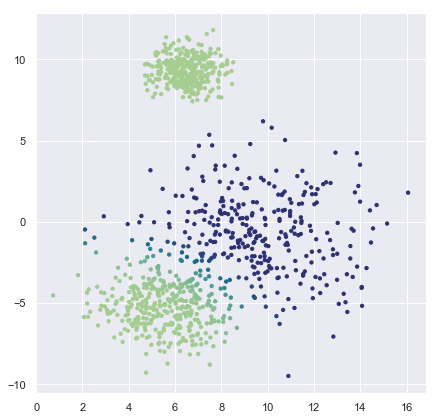

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict_proba(X)[:, 2], **scatter_params)

We see that on borders the probability is decreasing from blue (high) to light-green (low). 

GMM is a generative model, which means that it can generate new data. 

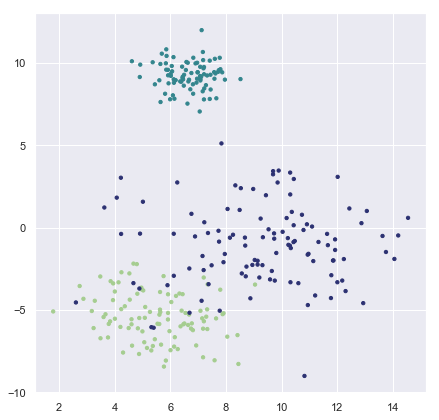

In [8]:
X_sample, y_sample = gmm.sample(300)
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=y_sample, **scatter_params)

We can use attributes `means_, covariances_, weights_` to check the model parameters.

In [9]:
gmm.weights_

array([0.34446714, 0.33292774, 0.32260512])

In [10]:
gmm.means_

array([[ 5.48209641, -5.23593525],
       [ 6.50411538,  9.31053032],
       [ 9.48380889, -0.80123746]])

In [11]:
gmm.covariances_

array([[[ 2.0743858 , -0.27461423],
        [-0.27461423,  1.99001766]],

       [[ 0.62890052, -0.00716215],
        [-0.00716215,  0.67031653]],

       [[ 5.83487179, -0.40516052],
        [-0.40516052,  6.04153319]]])